In [1]:
install.packages("ggrepel")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Impose a Cost Per Impression (CPI)

In [2]:
cpi_hat=7.19/1000
print(paste("Estimated cpi ",cpi_hat))

[1] "Estimated cpi  0.00719"


### Given an amount of money available and given a CPI, find how many impressions can be made

In [3]:
num_ads_at_cpi <- function(cpi,money) {
    #cpi = $/imp
    #money=$
    impressions=money/cpi
    return(impressions)
}

In [4]:
money=500
imps_avail=num_ads_at_cpi(cpi_hat,money)
print(paste("With $",money," available the number of impressions is ",imps_avail,sep=""))

[1] "With $500 available the number of impressions is 69541.0292072323"


### Given a number of impressions available, divide the evenly into a given number of cohorts

In [5]:
get_imp_per_cohort=function(imps_avail,num_cohorts) {
    cohort_counts=c()
    for(c in 1:num_cohorts) {
        cohort_counts=c(imps_avail/num_cohorts,cohort_counts)
    }
    return(cohort_counts)
}
num_cohorts=2
cohort_impressions=get_imp_per_cohort(imps_avail,num_cohorts)
print("The impressions can be roughly allocated per cohort : ")
print(cohort_impressions)

[1] "The impressions can be roughly allocated per cohort : "
[1] 34770.51 34770.51


### Given a hypothetical click rate, amount of funds available, estimated CPI, and actual cost-per-click find out out many impressions at that rate, with those funds would be available for purchase

In [6]:
specify_decimal <- function(x, k) trimws(format(round(x, k), nsmall=k))
#CPI = 'cost per impression'
getNumImpressionsAvailAtClickRateGivenFundsAndCPI=function(click_rate,funds_avail,cpi,cost_per_click=1.78) {
    #cost=impressions*cost_per_impression+click_rate*impressions*cost_per_click
    #cost=impressions(cost_per_impression+click_rate*cost_per_click)
    #impressions=cost/(cost_per_impression+click_rate*cost_per_click)
    impressions=funds_avail/(cpi+click_rate*cpi)
    return(impressions)    
}
click_rate=0.000001
num_imps_avail_at_rate=getNumImpressionsAvailAtClickRateGivenFundsAndCPI(click_rate,money,cpi_hat)
print(paste("At click rate ",click_rate," (and CPC=$0.97) with $",money,
            " available, the number of impressions purchasable is ",
            specify_decimal(num_imps_avail_at_rate, 0),sep=""))

[1] "At click rate 1e-06 (and CPC=$0.97) with $500 available, the number of impressions purchasable is 69541"


### Define a set of click rates to consider/explore with

In [7]:
click_rate_max=0.05
click_rate_start=0.0001
current_rate=click_rate_start
click_rates=c()
cr_counter=0
while(current_rate<=click_rate_max) {
    click_rates=c(click_rates,current_rate)
    #print(click_rates)
    if(cr_counter%%2==0) {
        current_rate=current_rate*5
    } else {
        current_rate=current_rate*2
    }
    cr_counter=cr_counter+1
}
print(paste(length(click_rates)," click rates to explore :",sep=""))
print(click_rates)

[1] "6 click rates to explore :"
[1] 1e-04 5e-04 1e-03 5e-03 1e-02 5e-02


#### Actually, set the rates based on what was observed

In [8]:
obs_rates=c(0.0143999,0.0148539,0.0149056,0.0161653,0.0173936,0.0176541,0.0234692,0.0266497)
min_obs_rate=round(min(obs_rates),digits=3)
max_obs_rate=round(max(obs_rates),digits=3)
click_rates=seq(from=min_obs_rate/2,to=max_obs_rate*2,by=min_obs_rate/4)
for(c_idx in 1:length(obs_rates)) {
    click_rates=c(click_rates,obs_rates[c_idx])
    print("pass")
}
click_rates=sort(click_rates)
print(click_rates)

comparisonLabel=function(ra,rb) {
    if(ra==0.0143999 && rb==0.0161653) {
        return("Rainforest")
    } else if(ra==0.0266497 && rb==0.0234692) {
        return("Arches")
    } else if (ra==0.0173936 && rb==0.0176541) {
        return("Dock")
    } else if(ra==0.0149056 && rb==0.0148539) {
        return("Beach")
    } else {
        return("")
    }
}
print("look")
for(o_idx in 1:(length(obs_rates))) {
    for(m_idx in 1:length(obs_rates)) {
        ra=obs_rates[o_idx]
        rb=obs_rates[m_idx]
        #print(paste("ra",ra,"rb",rb))
        n=comparisonLabel(ra,rb)
        print(n)
        }
}


[1] "pass"
[1] "pass"
[1] "pass"
[1] "pass"
[1] "pass"
[1] "pass"
[1] "pass"
[1] "pass"
 [1] 0.0070000 0.0105000 0.0140000 0.0143999 0.0148539 0.0149056 0.0161653
 [8] 0.0173936 0.0175000 0.0176541 0.0210000 0.0234692 0.0245000 0.0266497
[15] 0.0280000 0.0315000 0.0350000 0.0385000 0.0420000 0.0455000 0.0490000
[22] 0.0525000
[1] "look"
[1] ""
[1] ""
[1] ""
[1] "Rainforest"
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] "Beach"
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] "Dock"
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] ""
[1] "Arches"
[1] ""


#### Define a Power Routine

In [9]:
powerFunc=function(num_samps_a,rate_a,num_samps_b,rate_b,alpha) {

    #over-ride
    return(c(123,123))
    
    if(rate_a==rate_b) {
        #power is zero if rates are same ! :(
        return(c(0,0))
    } 
    if(num_samps_a>num_samps_a) {
        #setup so that num samps a < num samps b
        return(powerFunc(num_samps_b , rate_b , num_samps_a , rate_a , alpha))
    }
    
    #now num samps a < num samps b
    
    #################################################
    #first do 'one-sided'
    #the "power" is the probability of sampling beyond the "critical" alpha threshold for "a"
    crit_val=qbinom(1-alpha,num_samps_a,rate_a)
    #now, crit_value is the number of clicks such that this or any more clicks
    #has small prob. of occuring if H0 is true
    
    #now for "b" what's the prob of getting that or more clicks?
    prob_get_at_or_below_other=pbinom(crit_val,num_samps_b,rate_b)
    
    #power is 1 - that
    power_one_sided=1-prob_get_at_or_below_other
    
    ##############################################
    # now do two_sided
    crit_val_high=qbinom(1-alpha/2,num_samps_a,rate_a)
    crit_val_low=qbinom(alpha/2,num_samps_a,rate_a)
    
    prob_get_at_or_below_other=pbinom(crit_val_high,num_samps_b,rate_b)
    power_two_sided=1-prob_get_at_or_below_other
    
    return(c(power_one_sided,power_two_sided))
    
}

In [10]:
probs=seq(from=0.1,to=0.9,by=0.05)
obs=100
#alphas=c(0.1,0.05,0.01)
alphas=c(0.1,0.05,0.01)
for(p_1 in 1:length(probs)) {
    for(p_2 in 1:length(probs)) {
        prob1=probs[p_1]
        prob2=probs[p_2]
        obs1=50
        obs2=50
        print(paste("Prob1 is ",prob1," and prob2 ",prob2,sep=""))
        for(a in 1:length(alphas)) {
            this_alpha=alphas[a]
            power_results=powerFunc(obs1,prob1,obs2,prob2,this_alpha)
            one_tailed_power=power_results[1]
            two_tailed_power=power_results[2]
            print(paste("For alpha=",this_alpha," the power is ",one_tailed_power,sep=""))
        }        
    }
}

[1] "Prob1 is 0.1 and prob2 0.1"
[1] "For alpha=0.1 the power is 123"
[1] "For alpha=0.05 the power is 123"
[1] "For alpha=0.01 the power is 123"
[1] "Prob1 is 0.1 and prob2 0.15"
[1] "For alpha=0.1 the power is 123"
[1] "For alpha=0.05 the power is 123"
[1] "For alpha=0.01 the power is 123"
[1] "Prob1 is 0.1 and prob2 0.2"
[1] "For alpha=0.1 the power is 123"
[1] "For alpha=0.05 the power is 123"
[1] "For alpha=0.01 the power is 123"
[1] "Prob1 is 0.1 and prob2 0.25"
[1] "For alpha=0.1 the power is 123"
[1] "For alpha=0.05 the power is 123"
[1] "For alpha=0.01 the power is 123"
[1] "Prob1 is 0.1 and prob2 0.3"
[1] "For alpha=0.1 the power is 123"
[1] "For alpha=0.05 the power is 123"
[1] "For alpha=0.01 the power is 123"
[1] "Prob1 is 0.1 and prob2 0.35"
[1] "For alpha=0.1 the power is 123"
[1] "For alpha=0.05 the power is 123"
[1] "For alpha=0.01 the power is 123"
[1] "Prob1 is 0.1 and prob2 0.4"
[1] "For alpha=0.1 the power is 123"
[1] "For alpha=0.05 the power is 123"
[1] "For alph

#### Incorporate 3rd Party Code for Power (referred by Scott)

In [11]:
#from https://egap.shinyapps.io/power-app/
#reffered by Scott
power_calculator_binary_scott <- function(p1, p0, alpha,imp1,imp2){
#power_calculator_binary <- function(p1, p0, alpha=0.05, N)
    N=imp1+imp2
  lowertail <- (abs(p1 - p0) * sqrt(N/2))/sqrt(p1*(1-p1) + p0*(1-p0))
  uppertail <- -1*lowertail
  beta <- pnorm(lowertail- qnorm(1-alpha/2), lower.tail=TRUE) + 
     1 - pnorm(uppertail- qnorm(1-alpha/2), lower.tail=FALSE)
  return(beta)
}


#### another party! 

In [12]:
#https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Tests_for_Two_Proportions.pdf
morePowerOneTail=function(x1,x2,n1,n2,alpha) {
    z_crit=qnorm(alpha)
    #x1 = num clicks in group a
    #x2 = num clicks in group b
    #n1 = num impressions group a
    #n2 = num impre3ssions group b
    
    #estimate probs from data
    p1=x1/n1
    p2=x2/n2

    
}






#### More party!!!!

https://bolt.mph.ufl.edu/6050-6052/module-9/sampling-distribution-of-p-hat/

![http://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2013/02/mod9-sampp_hat2.png](http://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2013/02/mod9-sampp_hat2.png)

In [13]:
samp_dist_prop_mean_power=function(p_a,samp_a,p_b,samp_b,alpha) {
    #https://bolt.mph.ufl.edu/6050-6052/module-9/sampling-distribution-of-p-hat/
    #as long as each of np and n(p-1) are each greater than 10, a normal approximation
    #can be used
    #Since the sample size n appears in the denominator of the square root, 
    #the standard deviation does decrease as sample size increases. 
    #Finally, the shape of the distribution of p-hat will be approximately 
    #normal as long as the sample size n is large enough. The convention is to 
    #require both np and n(1 – p) to be at least 10.
    
    #calculations a
    stddev_a=sqrt( ( (p_a)*(1-p_a) ) / samp_a )

    #calculations b
    stddev_b=sqrt( ( (p_b)*(1-p_b) ) / samp_b )    
    
    if(p_a>p_b) {
        return (samp_dist_prop_mean_power(p_b,samp_b,p_a,samp_a,alpha))
    }

    #print(paste("Given p_a",p_a,"samp_a",samp_a,"p_b",p_b,"samp_b",samp_b))
    thresh_vals=c(p_a*samp_a , p_b*samp_b)
    #print("thresh_vals")
    #print(thresh_vals)
    good_thresh=thresh_vals[thresh_vals>=10]
    #print("good_thresh_vals")
    #print(good_thresh)
    if(length(good_thresh)<length(thresh_vals)) {
        return (c(-1,-1))
    }
    
    
    #first, do one-tail
    crit_val=qnorm(1-alpha,mean=p_a,sd=stddev_a)
    beta=pnorm(crit_val,mean=p_b,sd=stddev_b)
    power=1-beta
    
    #now do two-tail
    crit_val=qnorm(1-alpha/2,mean=p_a,sd=stddev_a)
    beta=pnorm(crit_val,mean=p_b,sd=stddev_b)
    power_two_tail=1-beta    
    
    return (c(power,power_two_tail))
    
}

#### Explore Possibilities!

In [14]:
num_tests=0
save_cols=c("cr_a","clicks_a","cr_b","clicks_b","imp_a","imp_b",
            "p_val","p_val_prop","alpha",
            "pow_one","pow_two","scott_two","psd_one_tail","psd_two_tail","comp_name")
save_mat=matrix(rep(-1,length(save_cols)),nrow=1,ncol=length(save_cols),byrow=TRUE)
#ddata=matrix(c(0,0))
impressions_observed=c(19514,19115,12608,13081,14833,14161,16571,16090)
impressions_observed=sort(impressions_observed)



for(c in 1:length(click_rates)) {
    click_rate=click_rates[c]
    num_imps_avail_at_rate=getNumImpressionsAvailAtClickRateGivenFundsAndCPI(click_rate,money/2,cpi_hat)
    #print(paste("At click_rate = ",click_rate," the num imps avail is  ",num_imps_avail_at_rate,sep=""))
    #now we have a click rate and a numbe100r of impressions available locked in for one of the two groups
    
    #at various alpha levels how can we see if the other cohort is different
    alphas=c(0.1,0.05,0.01)
    alphas=c(0.05)
    for(d in 1:length(click_rates)) {
        
        o_click_rate=click_rates[d]
        num_oimps_avail_at_rate=getNumImpressionsAvailAtClickRateGivenFundsAndCPI(o_click_rate,money/2,cpi_hat)
        #now we have a click rate and a number of impressions available locked in for the other group
        
        for(a in 1:length(alphas)) {
            
            #data for A (outer loop "_a")
            impression_possibilities_a=seq(from=5000,to=num_imps_avail_at_rate,by=5000)
            impression_possibilities_a=c(impression_possibilities_a,impressions_observed)
            impression_possibilities_a=sort(impression_possibilities_a)
            for(imp_idx_a in 1:length(impression_possibilities_a)) {

                #data for B (inner loop "_b")
                impression_possibilities_b=seq(from=5000,to=num_oimps_avail_at_rate,by=5000)
                impression_possibilities_b=c(impression_possibilities_b,impressions_observed)
                impression_possibilities_b=sort(impression_possibilities_b)
                for(imp_idx_b in 1:length(impression_possibilities_b)) {
                
                    
                    #power : prob ( reject H0 | H1 is true )
                    #H0 is rejected when we sample outside H0 "alpha region"
                    #power_results=powerFunc=function(num_samps_a,rate_a,num_samps_b,rate_b,alpha) {
                    power_results=powerFunc(impression_possibilities_a[imp_idx_a],click_rate,
                                            impression_possibilities_b[imp_idx_b],o_click_rate,
                                            alphas[a])
                    
                    scott_power=123

                    #    scott_power=power_calculator_binary_scott(
                    #                            click_rate,o_click_rate,
                    #                            alphas[a],
                    #        impression_possibilities_a[imp_idx_a],
                    #        impression_possibilities_b[imp_idx_b])
                        
                    
                    
                    
                    #define A data for test
                    tot_imps_a=round(impression_possibilities_a[imp_idx_a],0)
                    tot_imps_a_clicked=round(click_rate*tot_imps_a,0)
                    tot_imps_a_not_clicked=tot_imps_a-tot_imps_a_clicked
                    
                    #define B data for test
                    tot_imps_b=round(impression_possibilities_b[imp_idx_b],0)
                    tot_imps_b_clicked=round(o_click_rate*tot_imps_b,0)
                    tot_imps_b_not_clicked=tot_imps_b-tot_imps_b_clicked
                    
                    if(tot_imps_b_not_clicked>0 && tot_imps_b_clicked>0 && 
                       tot_imps_a_not_clicked>0 && tot_imps_a_clicked>0 ) {
                        #put data into matrix for test
                        test_matrix=matrix(c(tot_imps_a_clicked,tot_imps_a_not_clicked,
                                         tot_imps_b_clicked,tot_imps_b_not_clicked),
                                       nrow=2,ncol=2,byrow=TRUE)
                        
                        #p-value : probability of observing the data given that H0 is true
                        #H0, the click_rates are the same

                        #power (in eng )  : prob ( observing a small p-value in the test | data actually observed is "rare" enough )
                        #power prob ( p < alpha |  it should be less than alpha )
                        
                        test_result=fisher.test(test_matrix)
                        test_result_prop=prop.test(test_matrix)
                        num_tests=num_tests+1
                        p_val=test_result$p.value
                        p_val=123
                        

                            power_samp_dist=samp_dist_prop_mean_power(
                                click_rate,tot_imps_a,
                                o_click_rate,tot_imps_b,alphas[a])
                        
                        
                        p_val_prop=test_result_prop$p.value
                        p_val_prop=123
                        temp_row=c(click_rate,tot_imps_a_clicked,
                                   o_click_rate,tot_imps_b_clicked,
                                   as.integer(tot_imps_a),as.integer(tot_imps_b),
                                   p_val,p_val_prop,
                                   alphas[a],power_results[1],power_results[2],scott_power,
                                  power_samp_dist[1],power_samp_dist[2],comparisonLabel(click_rate,o_click_rate))
                        save_mat=rbind(save_mat,temp_row)
                        
                        } #all fields of matrix are positive
                    }#impressions b
                }#impressions a
            }#alpha loop
        }#click rate b
}#click rate a
print(paste("num_tests is ",num_tests,sep=""))
#print(save_mat)
print(dim(save_mat))
save_mat=save_mat[-1,]
print(dim(save_mat))

[1] "num_tests is 94864"
[1] 94865    15
[1] 94864    15


In [15]:
testing_df <- as.data.frame(save_mat)
colnames(testing_df) =save_cols
write.table(testing_df, file = "exact_tests.tsv", append = FALSE, quote = TRUE, sep = "\t",
                 eol = "\n", na = "NA", dec = ".", row.names = FALSE,col.names = TRUE, qmethod = c("escape", "double"),
                 fileEncoding = "")

In [16]:
#hist(testing_df[,5],main="Histogram of Impressions (A)")

In [17]:
library(ggplot2)
head(testing_df)

,cr_a,clicks_a,cr_b,clicks_b,imp_a,imp_b,p_val,p_val_prop,alpha,pow_one,pow_two,scott_two,psd_one_tail,psd_two_tail,comp_name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
temp_row,0.007,35,0.007,35,5000,5000,123,123,0.05,123,123,123,0.05,0.025,
temp_row.1,0.007,35,0.007,70,5000,10000,123,123,0.05,123,123,123,0.010004626858059,0.00278729834039215,
temp_row.2,0.007,35,0.007,88,5000,12608,123,123,0.05,123,123,123,0.00450133174212364,0.000928072028128835,
temp_row.3,0.007,35,0.007,92,5000,13081,123,123,0.05,123,123,123,0.00390127438817855,0.000761729551079227,
temp_row.4,0.007,35,0.007,99,5000,14161,123,123,0.05,123,123,123,0.00281879737042734,0.000486099055385103,
temp_row.5,0.007,35,0.007,104,5000,14833,123,123,0.05,123,123,123,0.00230519042771071,0.000367997874530901,


[1] "impa  10000  impb  10000"
[1] "impa  15000  impb  15000"


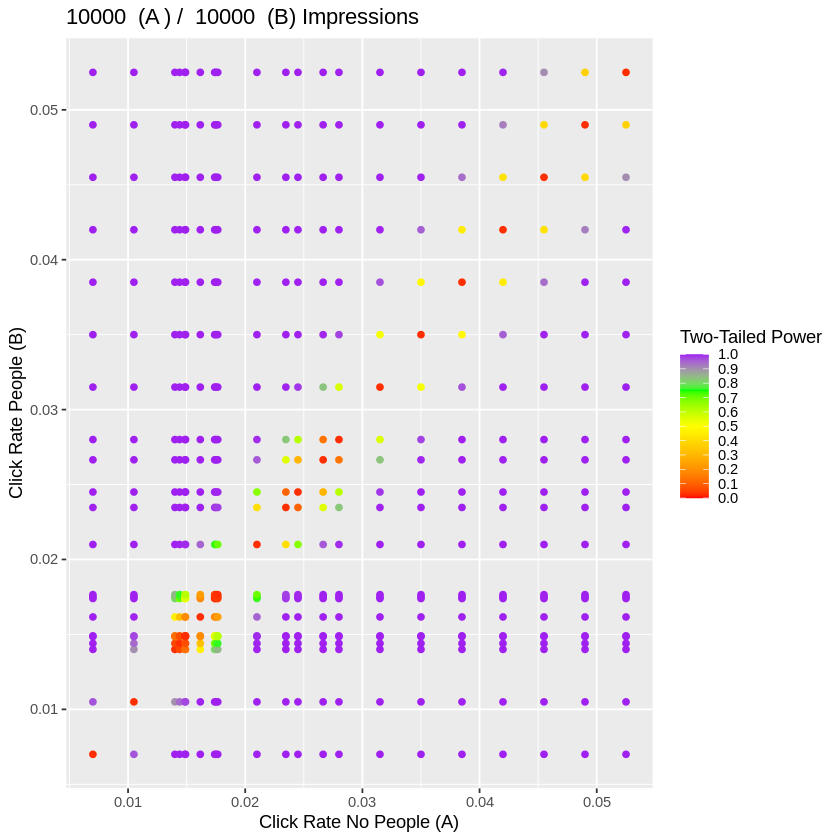

[1] "impa  20000  impb  20000"


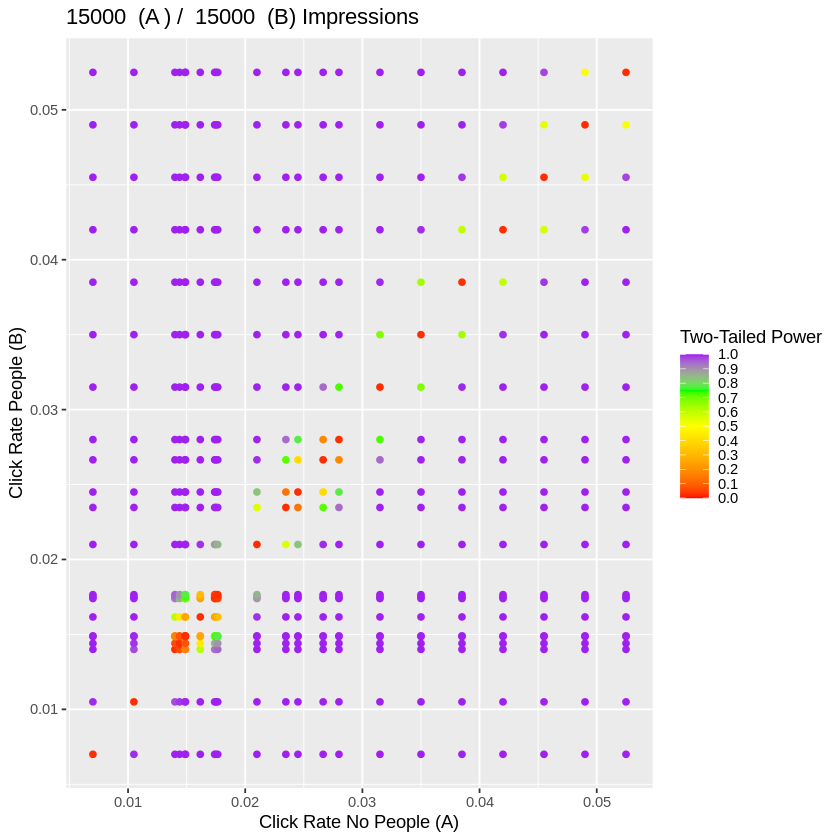

[1] "impa  30000  impb  5000"


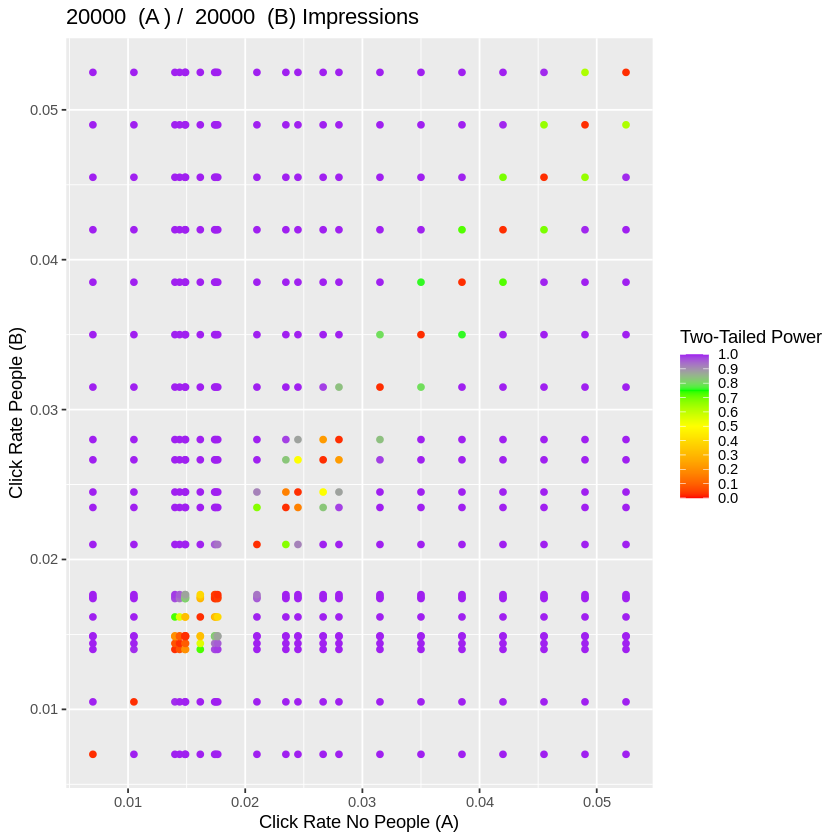

[1] "impa  30000  impb  30000"


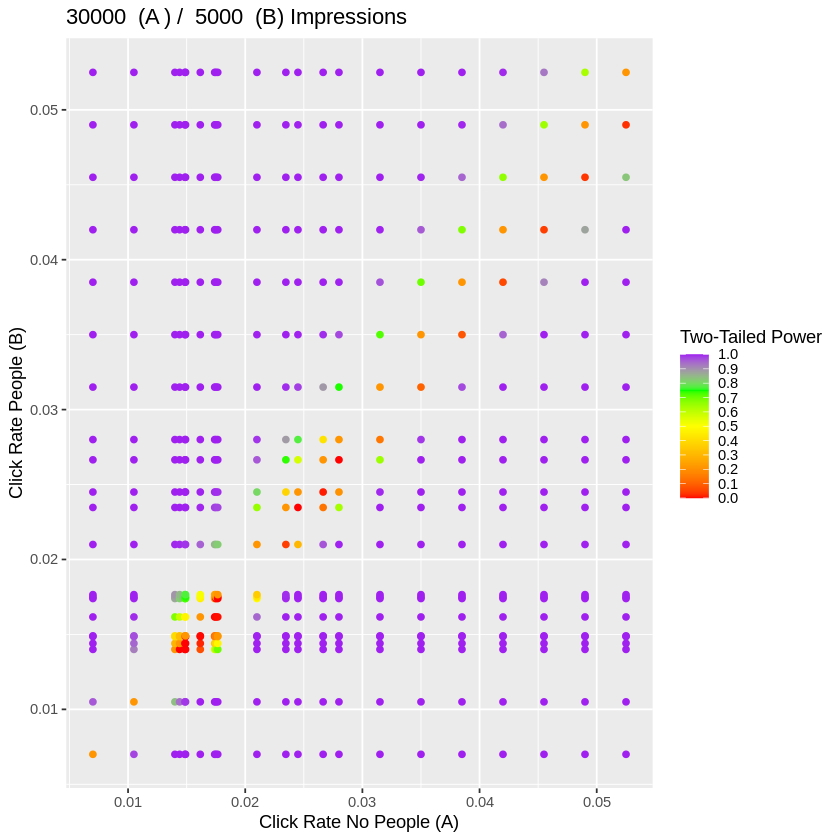

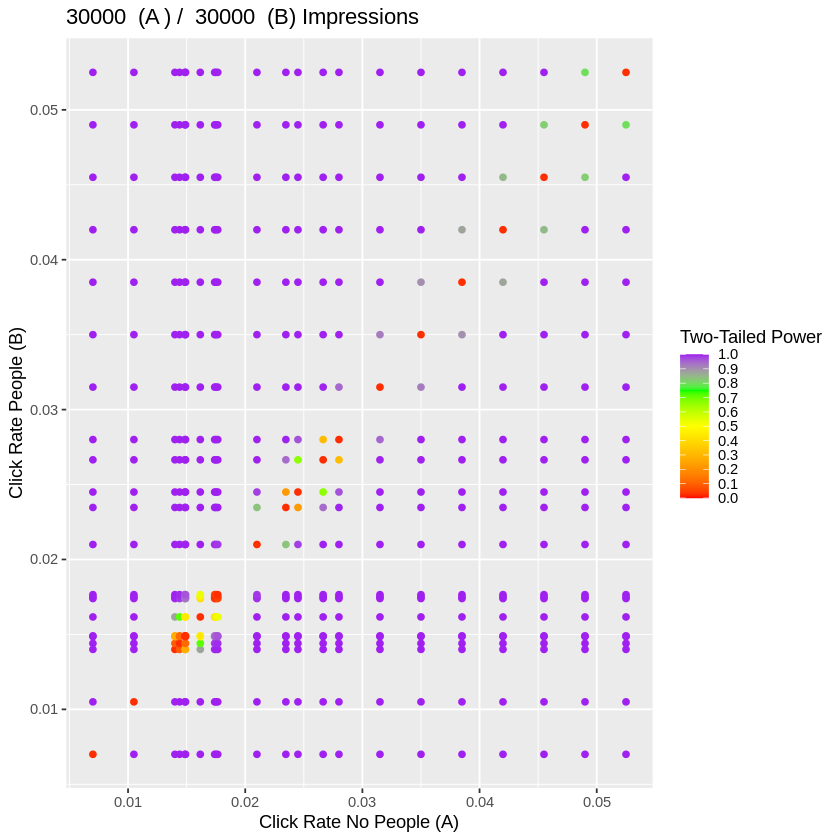

In [27]:
#head(testing_df)
#print(class(testing_df))
#print(type(testing_df))
#detach("package:ggrepel", unload=TRUE)
for(imp_idx_a in 1:length(impression_possibilities_a)) {
    imps_a=impression_possibilities_a[imp_idx_a]
    for(imp_idx_b in 1:length(impression_possibilities_b)) {
        imps_b=impression_possibilities_b[imp_idx_b]
        if((imps_a%%100==0 && imps_b%%100==0 && imps_a>=10000 && imps_a<=20000 && imps_b>=10000 && imps_b<=20000 && imps_a==imps_b) || (imps_a==30000 && imps_b==30000) ||  (imps_a==30000 && imps_b==5000)      )    {
            print(paste("impa ",imps_a," impb ",imps_b))
            # scatter plot ; ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()
            ais_data=testing_df[testing_df$imp_a==imps_a,]
            this_data=ais_data[ais_data$imp_b==imps_b,]
            #print(head(this_data))
            #print(dim(this_data))
            #print(this_data)
            the_title=paste(imps_a," (A ) / ",imps_b," (B) Impressions")
            #print(the_title)
            the_plot=ggplot(this_data,aes(x=as.numeric(cr_a),y=as.numeric(cr_b),color=as.numeric(psd_two_tail)),main=the_title)+
                geom_point()+
                ggtitle(the_title)+
                xlab("Click Rate No People (A)") + ylab("Click Rate People (B)")+
                scale_colour_gradientn(colours = c("red","orange","yellow","green","purple"),breaks = seq(from=0,to=1,by=0.1), limits=c(0,1))+
                labs(color='Two-Tailed Power',fill="Two-Tailed Power") +
                labs(fill='NEW LEGEND TITLEB')
                #geom_text_repel(
                #    data = subset(testing_df, "" != comp_name & imp_a==imps_a & imp_b==imps_b   ),
                #    aes(label = comp_name),
                #    size = 5
                #    #colour = 'black'
                #  )
            
            print(the_plot)
            #the_plot.show()
            #the_plots=c(the_plots,the_plot)
            }
        }
    }


In [19]:
impressions_observed=sort(impressions_observed)
print(impressions_observed)
summary(impressions_observed)

[1] 12608 13081 14161 14833 16090 16571 19115 19514


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12608   13891   15462   15747   17207   19514 

In [20]:
summary(obs_rates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01440 0.01489 0.01678 0.01819 0.01911 0.02665 

In [21]:
library(ggrepel)
testing_df_copy=as.data.frame(testing_df)
updatePowers=function(n) {
    if(nchar(n)<=1) {
        return("")
    } else {
       if(n=="Rainforest") {
           return("Rainforest .54")
       }
       if(n=="Arches") {
           return("Arches .66")
       }
       if(n=="Dock") {
           return("Dock .05")
       }
       if(n=="Beach") {
           return("Beach .03")
       }
    return("err")
    }
}
#print(updatePowers(c("Beach","n")))
testing_df_copy$comp_name=lapply(testing_df_copy$comp_name,updatePowers)
print(dim(testing_df_copy))

[1] 94864    15


 [1]  5000 10000 12608 13081 14161 14833 15000 16090 16571 19115 19514 20000
[13] 25000 30000
 [1]  5000 10000 12608 13081 14161 14833 15000 16090 16571 19115 19514 20000
[13] 25000 30000
[1] "impa  15000  impb  15000"


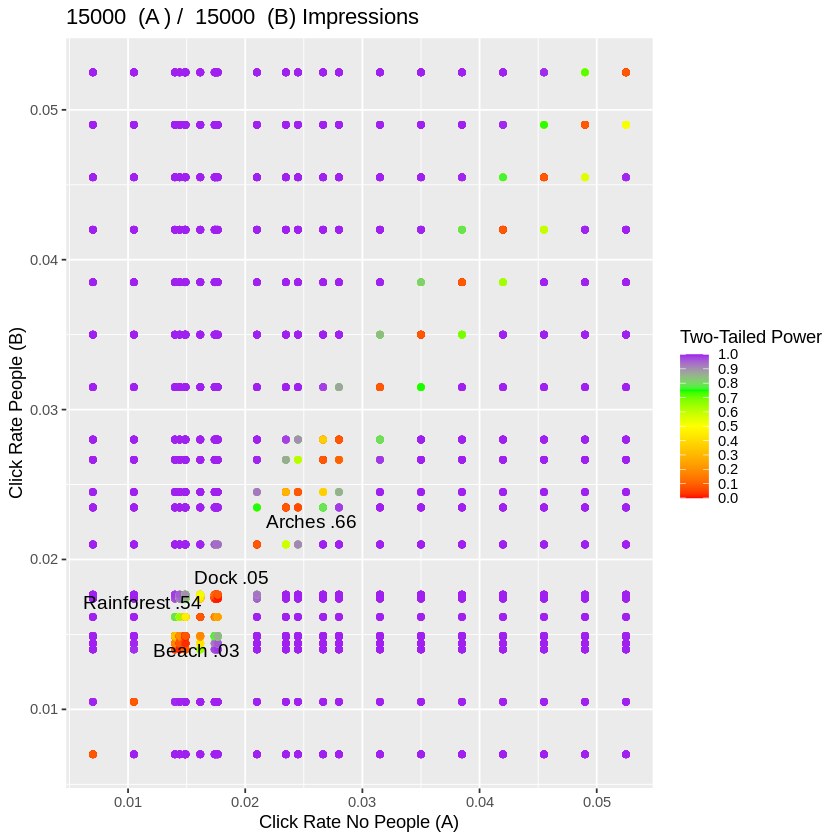

In [26]:
print(impression_possibilities_a)
print(impression_possibilities_b)
for(imp_idx_a in 1:length(impression_possibilities_a)) {
    imps_a=impression_possibilities_a[imp_idx_a]
    for(imp_idx_b in 1:length(impression_possibilities_b)) {
        imps_b=impression_possibilities_b[imp_idx_b]
        #if(imps_a%%100==0 && imps_b%%100==0 && imps_a>=10000 && imps_a<=20000 && imps_b>=10000 && imps_b<=20000) {
        if(imps_a==imps_b && imps_b==15000 ) {
            print(paste("impa ",imps_a," impb ",imps_b))
            # scatter plot ; ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()
            ais_data=testing_df_copy[testing_df$imp_a==imps_a,]
            this_data=testing_df_copy[ais_data$imp_b==imps_b,]
            
            the_title=paste(imps_a," (A ) / ",imps_b," (B) Impressions")
            #print(the_title)
            the_plot=ggplot(this_data,
                            aes(x=as.numeric(cr_a),y=as.numeric(cr_b),color=as.numeric(psd_two_tail))
                            ,main=the_title)+
                geom_point()+
                ggtitle(the_title)+
                scale_colour_gradientn(colours = c("red","orange","yellow","green","purple"),breaks = seq(from=0,to=1,by=0.1), limits=c(0,1))+
                xlab("Click Rate No People (A)") + ylab("Click Rate People (B)")+
                labs(color='Two-Tailed Power') +
                labs(fill='NEW LEGEND TITLEB')+
                geom_text_repel(
                    data = subset(testing_df_copy, "" != comp_name & imp_a==imps_a & imp_b==imps_b   ),
                    aes(label = comp_name),
                    size = 4,
                    colour = 'black'
                  )                
                #+labs(title = "max.overlaps = Inf")
            print(the_plot)
            }
        }
    }

In [23]:
testing_df_copy[nchar(testing_df_copy$comp_name)>=2,]

,cr_a,clicks_a,cr_b,clicks_b,imp_a,imp_b,p_val,p_val_prop,alpha,pow_one,pow_two,scott_two,psd_one_tail,psd_two_tail,comp_name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>
temp_row.14112,0.0143999,72,0.0161653,81,5000,5000,123,123,0.05,123,123,123,0.286387250605568,0.194441907652346,Rainforest .54
temp_row.14113,0.0143999,72,0.0161653,162,5000,10000,123,123,0.05,123,123,123,0.212558836528944,0.111507956150175,Rainforest .54
temp_row.14114,0.0143999,72,0.0161653,204,5000,12608,123,123,0.05,123,123,123,0.185244197186608,0.0856168314869905,Rainforest .54
temp_row.14115,0.0143999,72,0.0161653,211,5000,13081,123,123,0.05,123,123,123,0.180830915207618,0.0817071597146988,Rainforest .54
temp_row.14116,0.0143999,72,0.0161653,229,5000,14161,123,123,0.05,123,123,123,0.171281519368183,0.0735192552762802,Rainforest .54
temp_row.14117,0.0143999,72,0.0161653,240,5000,14833,123,123,0.05,123,123,123,0.165681548681516,0.0688939770613399,Rainforest .54
temp_row.14118,0.0143999,72,0.0161653,242,5000,15000,123,123,0.05,123,123,123,0.164327944112785,0.0677958425685137,Rainforest .54
temp_row.14119,0.0143999,72,0.0161653,260,5000,16090,123,123,0.05,123,123,123,0.155842247018547,0.0610905193092196,Rainforest .54
temp_row.14120,0.0143999,72,0.0161653,268,5000,16571,123,123,0.05,123,123,123,0.15227984392954,0.0583686157137334,Rainforest .54
